# Lab: 03

Name: Md. Tariquzzaman

ID: 190041101

Date: 31-1-23

## Given Values

S = [1, 9, 0, 0, 4, 1, 1, 0, 1]

H = [2, 0, 2, 1]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

S = [1, 9, 0, 0, 4, 1, 1, 0, 1]
H = [2, 0, 2, 1]


### Question 1
Use the built-in np.convolve function to convolve S with H. (Use ‘same’ for padding). Plot the output signal along with the original input signal and impulse response.

In [2]:
conv = np.convolve(S, H, mode='same')
print(conv)

[18  2 19 17  2 10  6  5  1]


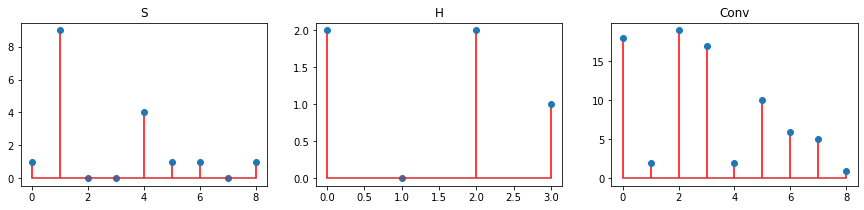

In [3]:
plt.figure(figsize=(15, 3)) 
plt.subplot(1, 3, 1).set_title('S')
plt.stem(np.arange(len(S)), S, 'r', use_line_collection=True)
plt.subplot(1, 3, 2).set_title('H')
plt.stem(np.arange(len(H)), H, 'r', use_line_collection=True)
plt.subplot(1, 3, 3).set_title('Conv')
plt.stem(np.arange(len(conv)), conv, 'r', use_line_collection=True)

plt.subplots_adjust(wspace=0.2,hspace=0)
plt.show()

### Question 2

Write a custom function InputSideConvolution that implements convolution using the Input Side Algorithm.

In [4]:
def InputSideAlgorithm(i1, i2):
  output = np.zeros(len(i1) + len(i2) - 1)
  for i in range(0, len(i1)):
    for j in range(0, len(i2)):
       output[i+j] = output[i+j] + (i1[i] * i2[j])
  return output

In [5]:
InputSideAlgorithm(S, H)

array([ 2., 18.,  2., 19., 17.,  2., 10.,  6.,  5.,  1.,  2.,  1.])

### Question 3

Write another function OutputSideConvolution that uses the Output Side Algorithm.

In [6]:
def OutputSideAlgorithm(i1, i2):
  output = np.zeros(len(i1) + len(i2) - 1)
  for i in range(0, len(output)):
    for j in range(0, len(i2)):
      if i-j>=0 and i-j<len(i1):
        output[i] = output[i] + (i1[i-j] * i2[j])
  return output

In [7]:
OutputSideAlgorithm(S, H)

array([ 2., 18.,  2., 19., 17.,  2., 10.,  6.,  5.,  1.,  2.,  1.])

### Question 4

Does all three produce the same result?

Using np.convolve:      [18  2 19 17  2 10  6  5  1]
Using input side algo:  [ 2. 18.  2. 19. 17.  2. 10.  6.  5.  1.  2.  1.]
Using output side algo: [ 2. 18.  2. 19. 17.  2. 10.  6.  5.  1.  2.  1.]


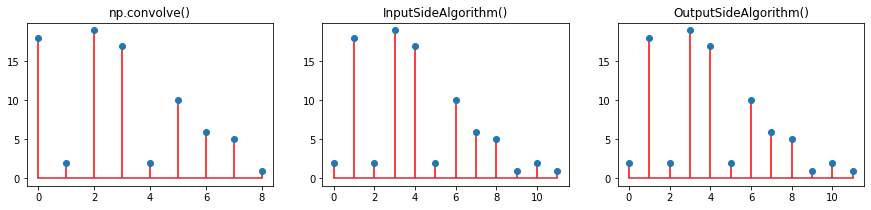

All three produces the same result


In [8]:
conv = np.convolve(S, H, "same")
isa = InputSideAlgorithm(S, H)
osa = OutputSideAlgorithm(S, H)
print(f'Using np.convolve:      {conv}')
print(f'Using input side algo:  {isa}')
print(f'Using output side algo: {osa}')
plt.figure(figsize=(15, 3)) 
plt.subplot(1, 3, 1).set_title('np.convolve()')
plt.stem(np.arange(len(conv)), conv, 'r', use_line_collection=True)
plt.subplot(1, 3, 2).set_title('InputSideAlgorithm()')
plt.stem(np.arange(len(isa)), isa, 'r', use_line_collection=True)
plt.subplot(1, 3, 3).set_title('OutputSideAlgorithm()')
plt.stem(np.arange(len(osa)), osa, 'r', use_line_collection=True)

plt.subplots_adjust(wspace=0.2,hspace=0)
plt.show()
print('All three produces the same result')

### Question 5

First create the signal wave_plus_ramp as shown in the given figures.
Now, create a low pass filter kernel with size 20. 

Hint: make a moving average filter kernel where all of these 20 samples are nonzero. Convolve it with wave_plus_ramp using np.convolve function. (Use ‘valid’ for padding) Output signal should retain the ramp and discard the wave. Can you tell why?

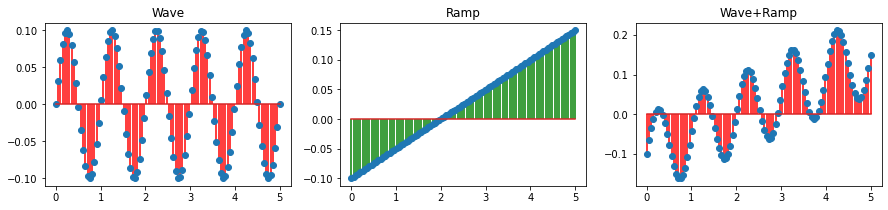

In [9]:
freq = 1
amplitude = 0.1
t = np.linspace(0, 5, 100)
plt.figure(figsize=(15, 3))
wave = amplitude * np.sin(2 * np.pi * freq * t)
plt.subplot(1, 3, 1).set_title('Wave')
plt.stem(t, wave,'r', use_line_collection=True)

ramp = 0.05*t - 0.1
plt.subplot(1, 3, 2).set_title('Ramp')
plt.stem(t, ramp, 'g', use_line_collection=True)

wave_plus_ramp = wave + ramp
plt.subplot(1, 3, 3).set_title('Wave+Ramp')
plt.stem(t, wave_plus_ramp, 'r', use_line_collection=True)
plt.subplots_adjust(wspace=0.2,hspace=0)
plt.show()

In [10]:
def low_pass_filter(inp, filter_size):
  low_pass_kernel = [1/filter_size] * filter_size
  output = np.convolve(inp, low_pass_kernel, 'valid')
  return output

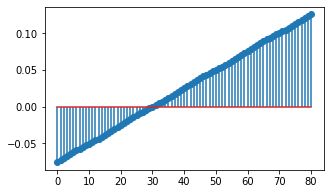

In [11]:
output = low_pass_filter(wave_plus_ramp, 20)
plt.figure(figsize=(5, 3))
plt.stem(np.arange(len(output)), output, use_line_collection=True)
plt.show()

### Question 6
Now, take the low_pass_filter kernel and change every sample’s sign. Now add 1 to the sample in the middle of the kernel. This will produce a high_pass filter.

Now convolve wave_plus_ramp with high_pass filter kernel using np.convolve.(Use ‘valid’ for padding) This will discard the ramp and retain the wave. Can you tell why?

In [16]:
def high_pass_filter(inp, filter_size):
  high_pass_kernel = [-1/filter_size] * filter_size
  high_pass_kernel[0] = 1 - high_pass_kernel[0]
  output = np.convolve(inp, high_pass_kernel, 'valid')
  return output

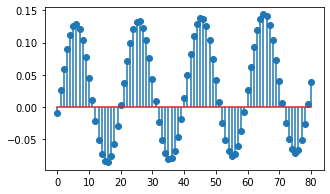

In [17]:
output = high_pass_filter(wave_plus_ramp, 20)
plt.figure(figsize=(5, 3))
plt.stem(np.arange(len(output)), output, use_line_collection=True)
plt.show()